<a href="https://colab.research.google.com/github/geeorgebixleer/NPL_Analisis_de_sentimientos/blob/main/NPL_Analisis_de_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analizador de sentimientos de las elecciones presidenciales 2018 en Colombia**

##**Introducción:**

El proyecto consiste en un algoritmo que permite analizar sentimientos utilizando técnicas de Procesamiento de Lenguaje Natural (NLP), basadas en Machine Learning. El analizador de sentimientos permite comprender cómo están estructurados los datos y qué palabras son más frecuentes en los tweets analizados.

Para este fin, el dataset utilizado está constituido por un conjunto de tweets sobre las elecciones presidenciales del 2018 en Colombia. Estos datos servirán para explorar y visualizar el sentimiento de los usuarios en relación a los candidatos presidenciales a través de las redes sociales.


##**Resumen:**

Las técnicas aplicadas al dataset permitieron reestructurar los datos, de forma que, el algoritmo pueda interpretar los sentimientos negativos y positivos y pueda relacionarlos con cada palabra encontrada en los tweets. Para lo anterior también se eliminaron palabras "irrelevantes" y repetitivas y se construyó un modelo que clasifica los datos, mismo que calcula el valor de precisión.

Para poder mostrar visualmente el resultado del análisis de sentimientos, se generaron imágenes wordcloud, mismas que representan las palabras más frecuentes dentro de los tweets. Por otra parte, las técnicas implementadas demostraron ser limitadas para procesar correctamente las "stop words", por lo que es necesario implementar nuevas técnicas de inteligencia artificial para poder procesar los datos.

##1.Configurando el ambiente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #natural langauge toolkit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #modelo de regresión logística
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize #segrega tipos de puntuacón en un texto
from nltk.corpus import stopwords #caso no existir el diccionario, se debe instalar todo el paquete
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore") #ignorar advertencias

In [ ]:
nltk.download('stopwords') #descarga conjunto de palabras vacías

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

##2.Importación y transformación de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp - Data Science/Modulo4_IA aplicada al procesamiento del lenguaje natural /1.Inteligencia artificial/1.Lenguaje Natural: Introducción a NLP con analisis de sentimiento/colombian_elections.csv')
df.head()

,Unnamed: 0,tweet_id,tweetText,polarity_value,polarity_type,topic,set
0,2,ID:142391947707940864,@marodriguezb Gracias MAR,P,AGREEMENT,otros,train
1,3,ID:142416095012339712,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,AGREEMENT,política,train
2,4,ID:142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,AGREEMENT,otros,train
3,6,ID:142483342040907776,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,AGREEMENT,entretenimiento,train
4,8,ID:142494476051562496,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,AGREEMENT,otros,train


In [ ]:
# renombrando columnas
df = df[["tweetText", "polarity_value"]].rename(columns={"tweetText":"texto", "polarity_value":"sentimiento"})

In [ ]:
# total de valores P y N: razonablemente balanceado
df["sentimiento"].value_counts()

sentimiento
P    2884
N    2182
Name: count, dtype: int64

In [ ]:
# nueva columna(feelin); sustituyendo valores dentro de columna, str->int
df["feelin"] = df["sentimiento"].replace(["N", "P"], [0,1])
df.head()

,texto,sentimiento,feelin
0,@marodriguezb Gracias MAR,P,1
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1


##3.Bag of words - Representaciones del lenguaje humano

Bag of words es un conteo de frecuencia de las palabras; vectorizer cumple la función para ese tipo de cálculos.
- Entrenar y clasificar los datos para el análisis de sentimiento.
- Medir los resultados del análisis de sentimientos.

**Función clasificador:**

- *CountVectorizer()* : método para contar frecuencia de ocurrencia de palabras.
- *LogisticRegression()*: método de clasificación regresión logística.
- *max_features*: limita el total de palabras más frecuentes.


In [ ]:
def clasificador(df, columna_texto, columna_categoria): #columna_texto=tweet; columna_categoria=sentimiento
  vectorizer = CountVectorizer(lowercase=True)  #instanciando modelo CountVectorizer (método para frecuencias)
  regression = LogisticRegression() #instanciando modelo de logistic regression (método de clasificación)

  vectorizer = CountVectorizer(lowercase=True, max_features=100) # instanciando modelo; lowercase= conveierte a minusculas; max_features= limite de palabras frecuentes
  bag_of_words = vectorizer.fit_transform(df[columna_texto]) #ajustando columna con vectorizer
  X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df[columna_categoria], random_state=20) #diviendo datos para entrenamiento y prueba

  regression.fit(X_train, y_train) #ajustando modelo de regresión
  return regression.score(X_test, y_test) #retorna precisión del modelo

In [ ]:
clasificador(df, "texto", "feelin")

0.7000789265982637

- Al evaluar un modelo de regresión logística, valores cercanos a 1 se consideran positivos y valores que tienden a 0 son negativos.






##4.Visualización de datos con *wordcloud*

Una imágen "wordcloud" muestra las palabras con mayor frecuencia de un texto, de modo que, el tamaño de las palabras es proporcional a su ocurrencia.

- Ayuda a determinar el tratamiento preliminar de los datos y así mejorar la precisión del modelo.

In [ ]:
# lista comprimida de palabras
palabras = ' '.join([palabras for palabras in df['texto']]) #join=concatena todas las palabras usadas en los tweet

In [ ]:
len(palabras) #longitud de la lista

556945

In [ ]:
%matplotlib inline

In [ ]:
# funcion que imprime wordcloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,5)) #tamaño plot
  plt.imshow(wordcloud, interpolation='bilinear') #imshow= visualizacion; 'interpolation' para optimizar la función
  plt.axis('off') #configuracion ejes

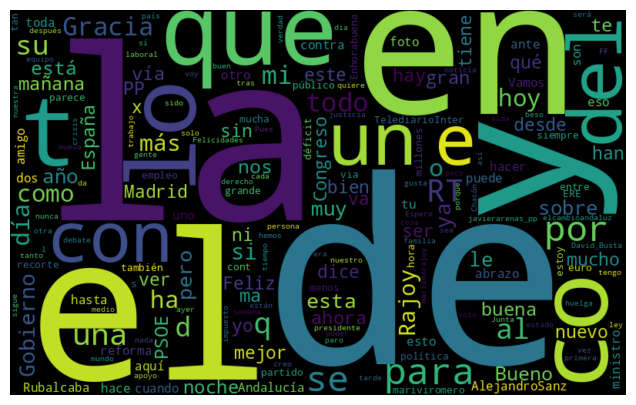

In [ ]:
# parametros para obtener mayor número de palabras
wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
plot_cloud(wordcloud)

- Para generar nuevas imágenes wordcloud, se generan las siguientes funciones usando el método query, mismas que ayudan a filtrar el texto de acuerdo a sentimientos positivos o negativos.


In [ ]:
# función para sentimientos negativos
def plot_cloud_neg(df):
  df_neg = df.query("sentimiento == 'N'")
  palabras = ' '.join([palabras for palabras in df_neg["texto"]])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

In [ ]:
# función para sentimientos positivos
def plot_cloud_pos(df):
  df_pos = df.query("sentimiento == 'P'")
  palabras = ' '.join([palabras for palabras in df_pos["texto"]])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

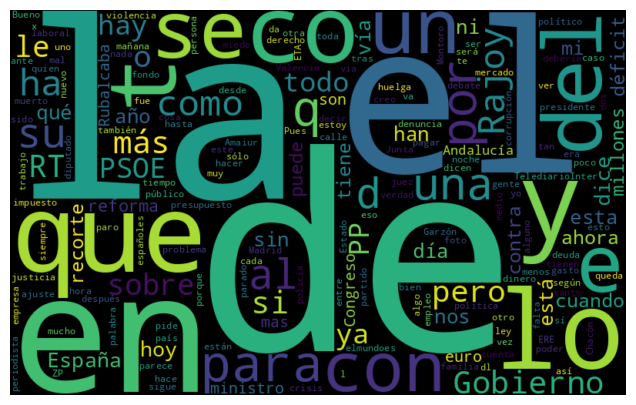

In [ ]:
plot_cloud_neg(df)

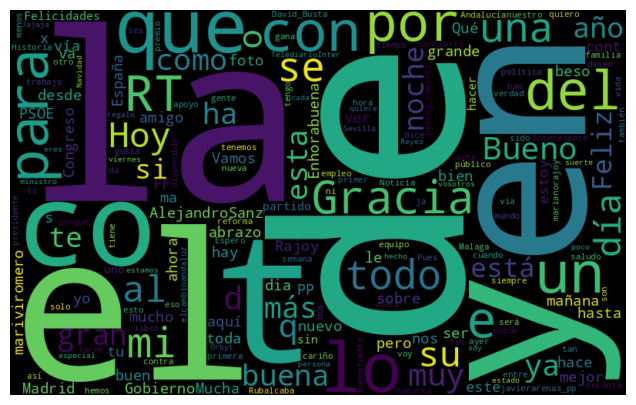

In [ ]:
plot_cloud_pos(df)

- Las palabras mostradas en ambas imágenes wordcloud son prácticamente iguales y carecen de relevancia para la finalidad de este análisis.

- Estas palabras se conocen como "*stopwords*", las cuáles suelen ser muy frecuentes pero no aportan valor alguno e interfieren en el análisis de sentimiento.

Ahora vamos a analizar esas stop words, ver cómo las tratamos para que nos facilite más la vida, para que al modelo de inteligencia artificial que vamos a construir le sea más fácil de entender el problema.

##5.Tokenización y la biblioteca NLTK

Calculando las palabras con mayor frecuencia de aparición en el texto.


In [ ]:
# dataframe con palabras frecuentes y valor de frecuencia
token_espacio = tokenize.WhitespaceTokenizer() #metodo que separa por espacios en blanco
frase_token = token_espacio.tokenize(palabras) #tokenizando 'palabras'
frecuencia = nltk.FreqDist(frase_token) #calculando frecuencia de 'palabras' tokenizadas
df_frecuencia = pd.DataFrame({'palabra':list(frecuencia.keys()), 'frecuencia':list(frecuencia.values())}) #df de frecuencia con más de 555,000 palabras

In [ ]:
df_frecuencia.head() #frecuencia de aparicion de las palabras

,palabra,frecuencia
0,@marodriguezb,3
1,Gracias,119
2,MAR,1
3,Off,1
4,pensando,5


In [ ]:
df_frecuencia.nlargest(columns='frecuencia', n=10) #nlargest: valores con mayor frecuencia de aparición

,palabra,frecuencia
13,de,3863
9,la,2365
6,el,1929
5,en,1886
26,a,1886
57,y,1655
10,que,1575
107,los,934
170,del,863
20,no,713


##6.Tratamiento de stop words

Las stop words son palabras que no contienen relevancia en determinado contexto y pueden ser removidas sin perder semântica de dicha frase. La lista no es fija y universal, pudiendo ser alterada dependiendo del contexto e idioma.

In [ ]:
df.head()

,texto,sentimiento,feelin
0,@marodriguezb Gracias MAR,P,1
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1


- Con la siguiente función se obtiene la frecuencia de las palabras con mayor ocurrencia. Para lo anterior, se utiliza el dataframe df y las columnas "texto" y "frecuencia".

In [ ]:
# función histograma para graficar palabras más frecuentes
def histo_barras(df, texto, cantidad):
  palabras = ' '.join([palabras for palabras in df["texto"]]) #lista de palabras concatenadas
  frase_token = token_espacio.tokenize(palabras) #tokenizacion por espacios
  frecuencia = nltk.FreqDist(frase_token) #calculo de frecuencia de palabras

  plt.figure(figsize=(12,8)) #tamaño de lienzo
  df = df_frecuencia.nlargest(columns='frecuencia', n=cantidad) #nuevo dataframe con cantidad 'n' de palabras frecuentes
  ax = sns.barplot(data=df, x='palabra', y='frecuencia', color='blue') #grafico

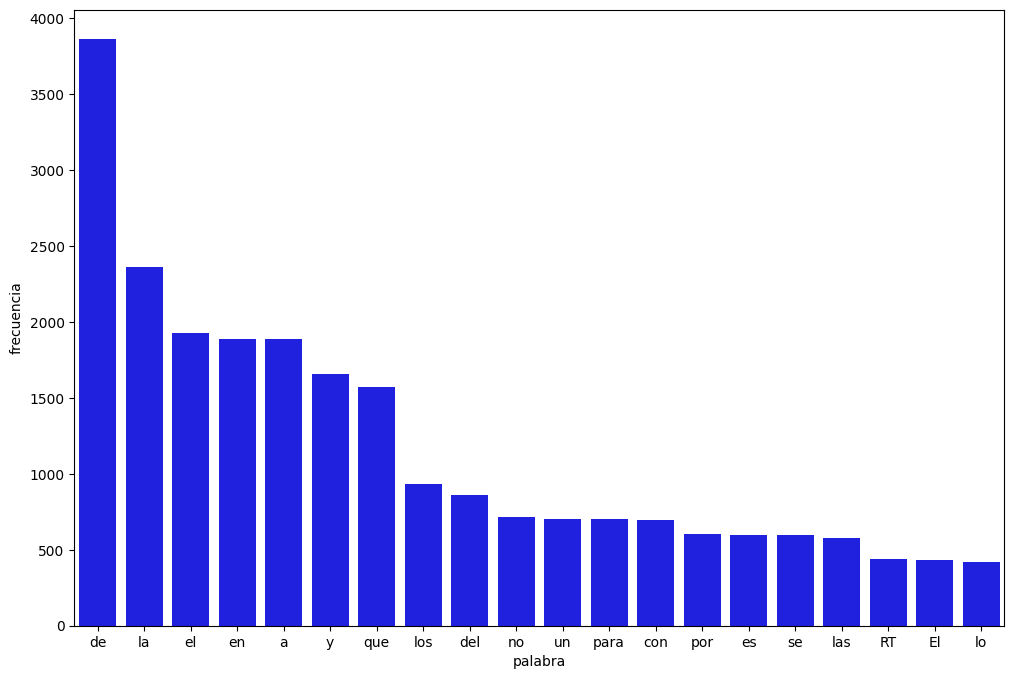

In [ ]:
histo_barras(df, df['texto'], 20)

In [ ]:
# libreria nltk modulo stopwords
irrelevantes =  nltk.corpus.stopwords.words('spanish') # lista con palabras irrelevantes idioma español
print(irrelevantes)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

- El siguiente ciclo *for* permite eliminar los "stop words" del texto, obteniendo como resultado la columna "tratamiento_1".

In [ ]:
# ciclo: genera palabras tokenizadas[df.texto], filtra palabras relevantes, se agrupan nuevamente las palabras y se almacenan en una nueva columna[tratamiento_1]

palabras_relevantes = list() #lista que almacena las palabras que sí son relevantes

for opinion in df.texto: #opinion, cada tweet dentro de df['texto']

  nueva_frase = list() #lista que almacenará palabras relevantes
  palabras_texto = token_espacio.tokenize(opinion) #tokenizando palabras de ['texto']

  for palabra in palabras_texto: #cada palabra tokenizada dentro de 'palabras_texto'
    if palabra not in irrelevantes: #filtro que excluye palabras 'irrelevantes'
      nueva_frase.append(palabra) #almacena palabras tokenizadas que sean 'relevantes'

  palabras_relevantes.append(' '.join(nueva_frase)) #agrupando palabras

# creando nueva columna en 'df' con datos tratados
df['tratamiento_1'] = palabras_relevantes

In [ ]:
# columna[tratamiento_1] sin stopwords
df.head()

,texto,sentimiento,feelin,tratamiento_1
0,@marodriguezb Gracias MAR,P,1,@marodriguezb Gracias MAR
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0,"Off pensando regalito Sinde, va SGAE van corruptos. Intento sacar conclusiones (lo intento)"
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1,Conozco alguien q adicto drama! Ja ja ja suena d algo!
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1,Buen día todos! Lo primero mandar abrazo grande Miguel familia @libertadmontes Hoy podría ser día grandeza humana.


- Con el dataframe tratado, podemos calcular nuevamente el valor de precisión de nuestro modelo.

In [ ]:
# clasificador de precisión del modelo l resultado de precisión es normal, porque los tweets contienen palabras compactadas(abreviadas)
clasificador(df, "tratamiento_1", "feelin")

0.6866614048934491

##7.Visualización de los datos tratados

In [ ]:
# df con frecuencia de 'palabras_tratadas'
palabras_tratadas = ' '.join([palabras for palabras in df['tratamiento_1']]) #lista de palabras tratadsa concatenadas
frase_token = token_espacio.tokenize(palabras_tratadas) #tokenizando 'palabras_tratadas'
frecuencia_tratada = nltk.FreqDist(frase_token) #calculando frecuencia
df_frecuencia_tratada = pd.DataFrame({'palabras_tratadas':list(frecuencia.keys()), 'frecuencia_tratada':list(frecuencia.values())})

df_frecuencia_tratada.nlargest(columns='frecuencia_tratada', n=10) #nlargest: función que imprime los valores dominantes

,palabras_tratadas,frecuencia_tratada
13,de,3863
9,la,2365
6,el,1929
5,en,1886
26,a,1886
57,y,1655
10,que,1575
107,los,934
170,del,863
20,no,713


In [ ]:
# funcion gráfico de frecuencia 'palabras_tratadas'
def freq_barras(df, texto, cantidad):
  palabras_tratadas = ' '.join([palabras for palabras in df['tratamiento_1']]) #

  frase_token = token_espacio.tokenize(palabras_tratadas)
  frecuencia = nltk.FreqDist(frase_token)

  plt.figure(figsize=(12,8))
  df = df_frecuencia_tratada.nlargest(columns='frecuencia_tratada', n=cantidad)
  ax = sns.barplot(data=df, x='palabras_tratadas', y='frecuencia_tratada', color='blue')
  ax.set(ylabel='conteo')

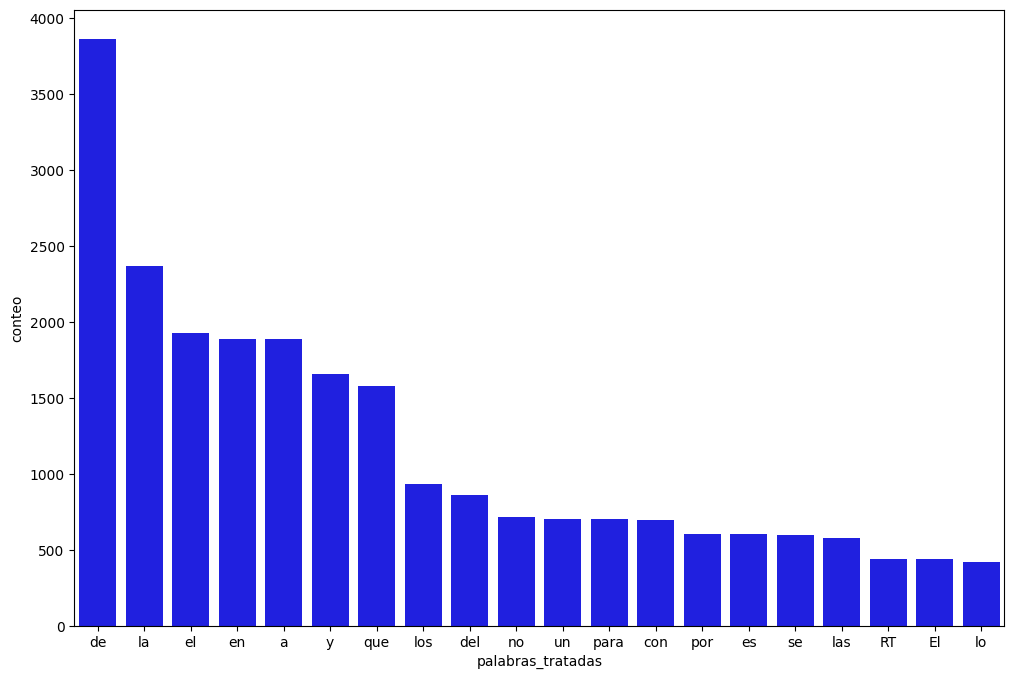

In [ ]:
freq_barras(df, df['tratamiento_1'], 20)

In [ ]:
# funcion wordcloud sentimientos positivos
def plot_cloud_p(df):
  df_p = df.query("sentimiento == 'P'")
  palabras = ' '.join([palabras for palabras in df_p["tratamiento_1"]])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

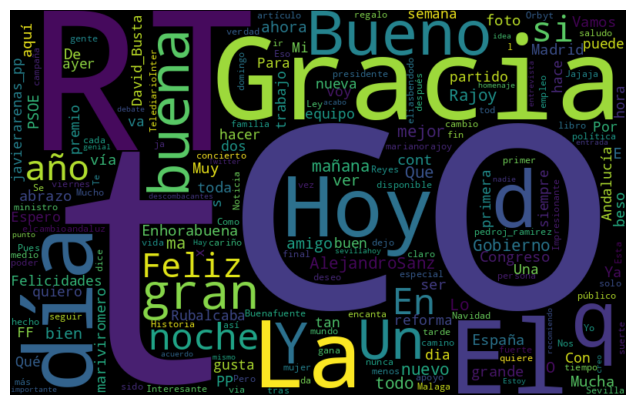

In [ ]:
plot_cloud_p(df)

In [ ]:
# funcion wordcloud sentimientos negativos
def plot_cloud_n(df):
  df_n = df.query("sentimiento == 'N'")
  palabras = ' '.join([palabras for palabras in df_n["tratamiento_1"]])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')

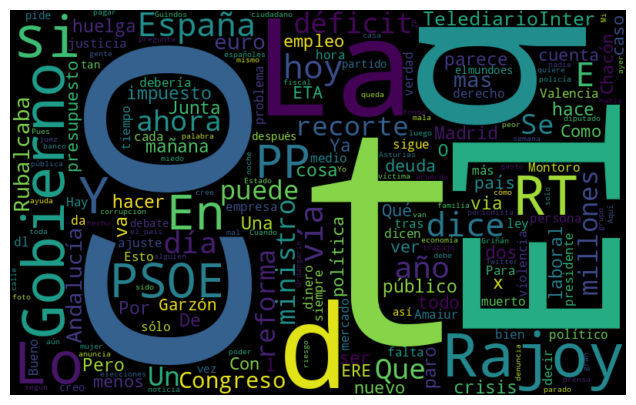

In [ ]:
plot_cloud_n(df)

##Conclusión

- Se cumplió el principal de eliminar los "stop words" del dataset mediante la tokenización y la biblioteca NLTK.

- Se proyectaron imágenes wordcloud para visualizar de forma simplificada las palabras con mayor frecuencia, tanto para sentimientos positivos como negativos.

- Mediante "bag of words" se construyó un clasificador. Sin embargo, el valor de precisión del clasificador no mejoró significativamente después del tratamiento de "stop words", lo cuál, se debe principalmente al tipo de texto extraído de Twitter, donde es muy frecuente el uso de palabras compactadas y de abreviaturas.

- Muchas de las palabras identificadas por NLTK como "irrelevantes" suelen ser también conectores de palabras, por lo que, al eliminar estas palabras se pueden estar eliminando datos importantes, lo que incrementa la dificultad en el análisis de sentimiento y puede afectar negativamente el rendimiento del clasificador, ya que la información sobre la relación entre las palabras se ve afectada.

- Por lo tanto, es importante explorar nuevas técnicas de IA para ajustar adecuadamente los parámetros, mejorar la precisión del clasificador y obtener las palabras que mejor representan el dataset al analizar los sentimientos.
